/tmp/ipython-input-4096725414.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Route', y='Ridership', data=df, palette='Blues')


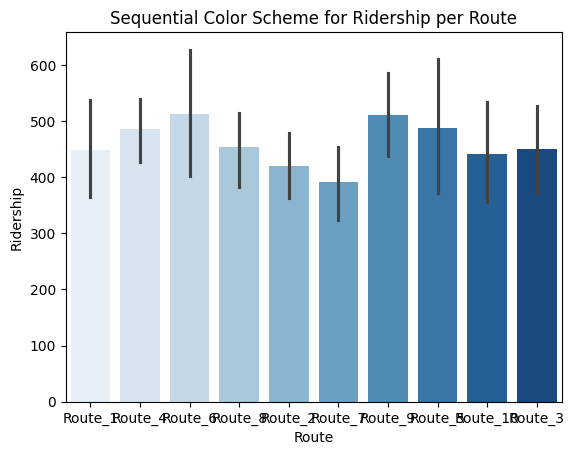

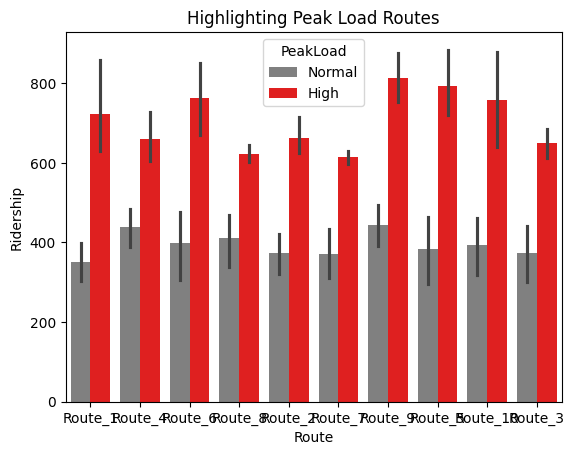

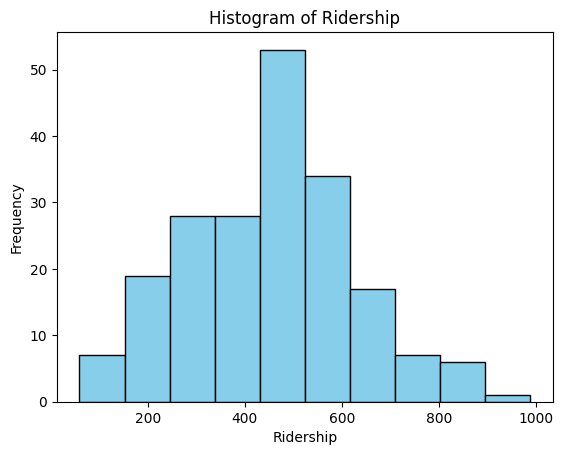

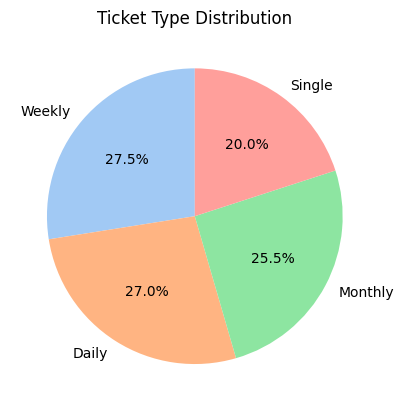

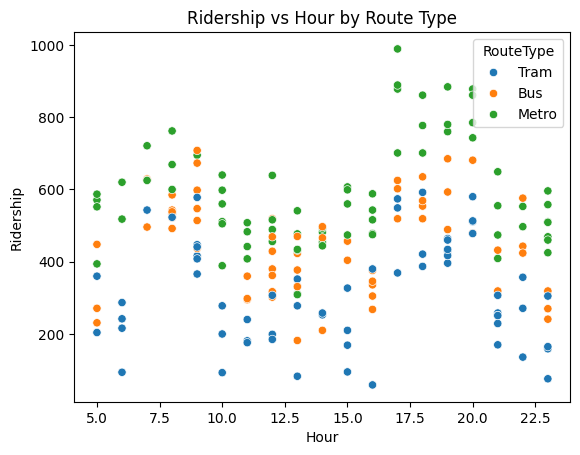

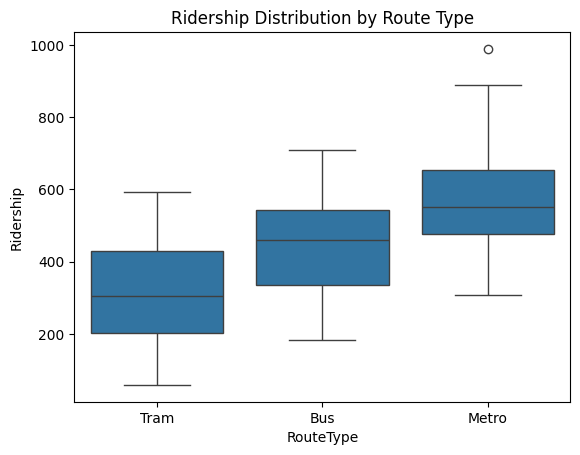

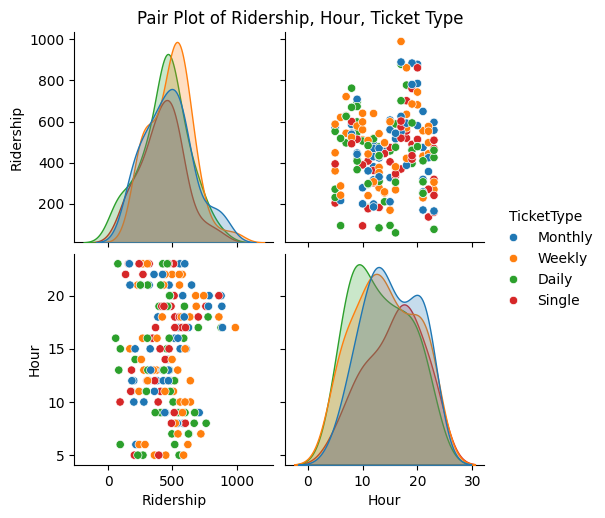

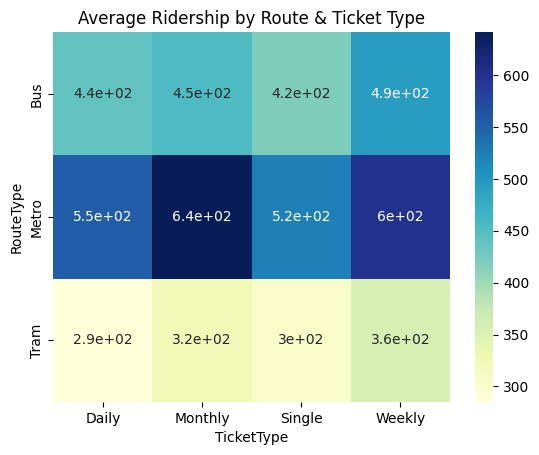

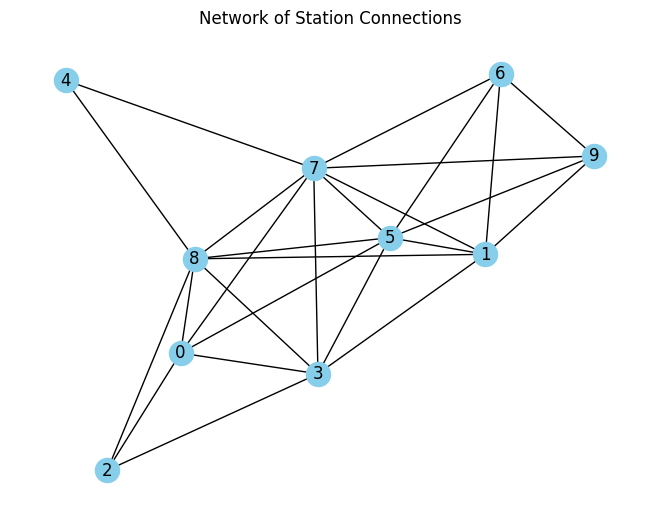

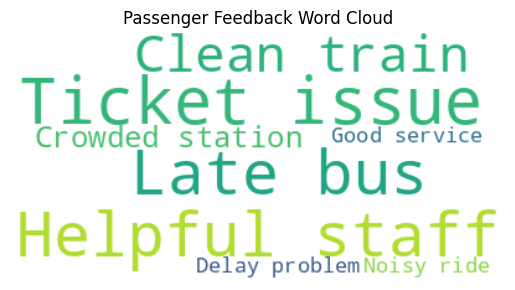

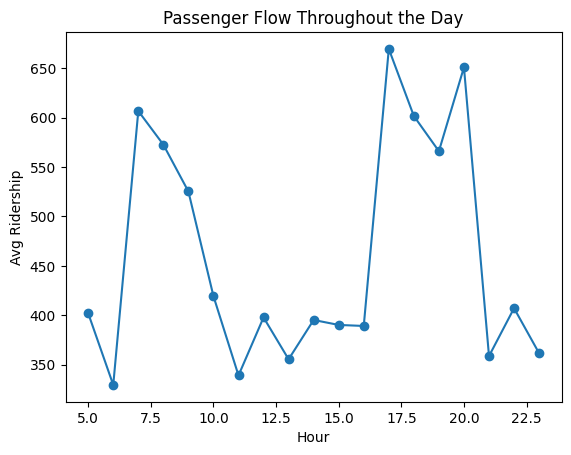

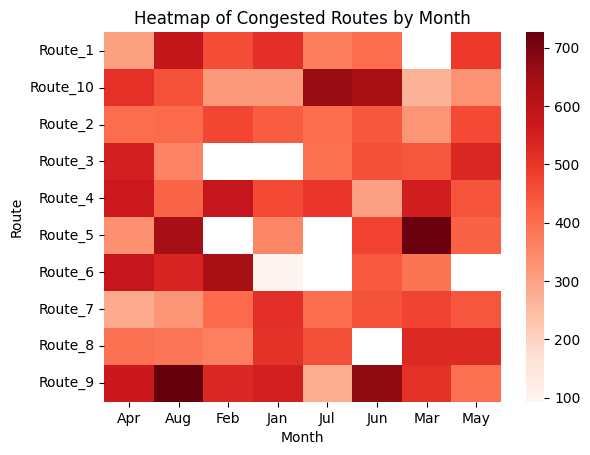

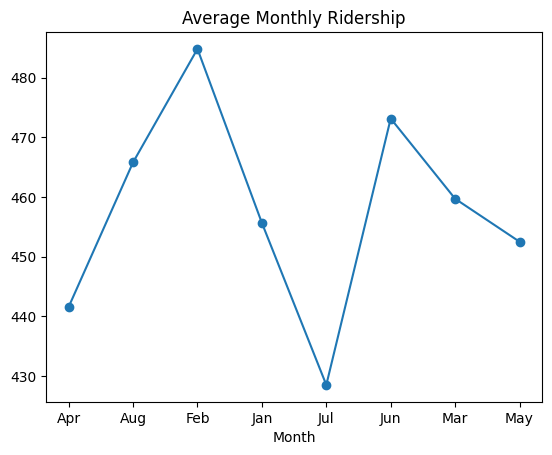

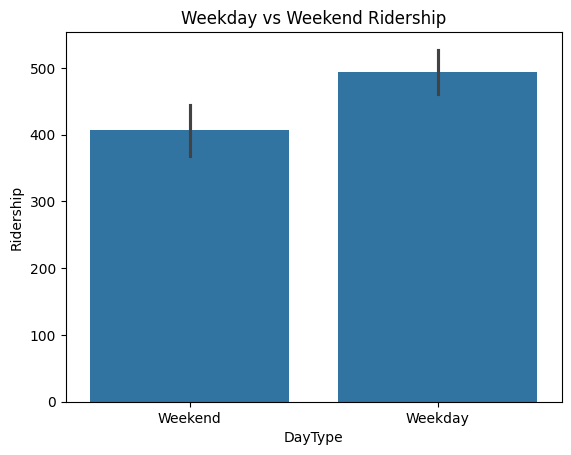

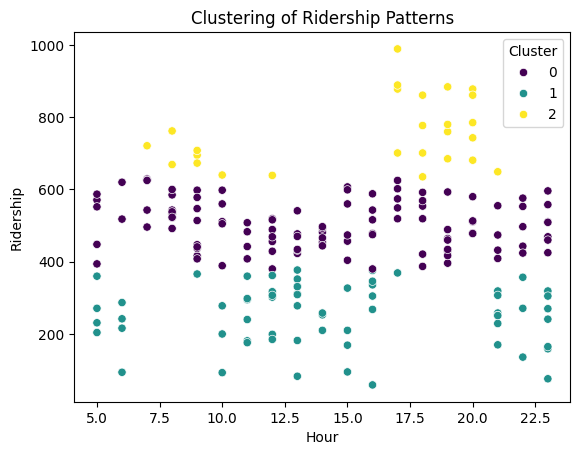

Gradient Boosting R² Score: 0.787


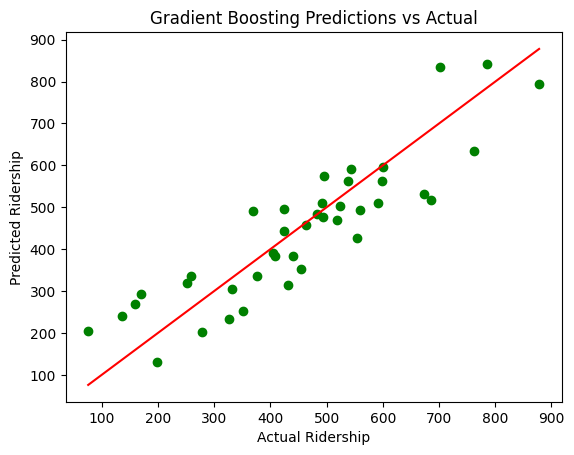

In [1]:
# =====================================================
# Public Transport Usage Visualization & ML - Complete Notebook
# =====================================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import plotly.express as px
import folium


# 2️⃣ Generate Improved Synthetic Dataset (200 Records)
routes = [f"Route_{i}" for i in range(1, 11)]
ticket_types = ['Single', 'Daily', 'Weekly', 'Monthly']
route_types = ['Bus', 'Metro', 'Tram']
day_types = ['Weekday', 'Weekend']
hours = list(range(5, 24))
weather_types = ['Sunny', 'Rainy', 'Cloudy']

data = []
for _ in range(200):
    route = random.choice(routes)
    route_type = random.choice(route_types)
    ticket = random.choice(ticket_types)
    hour = random.choice(hours)
    base = 200
    if route_type == 'Metro': base += 300
    elif route_type == 'Bus': base += 150
    if ticket in ['Weekly','Monthly']: base += 100
    if 7 <= hour <= 9 or 17 <= hour <= 20: base += 250
    day_type = random.choice(day_types)
    if day_type == 'Weekend': base -= 100
    ridership = int(np.random.normal(base, 50))
    weather = random.choice(weather_types)
    traffic = random.randint(1,5)
    data.append([route, route_type, ticket, hour, ridership, weather, traffic, day_type])

df = pd.DataFrame(data, columns=['Route', 'RouteType', 'TicketType', 'Hour', 'Ridership', 'Weather', 'Traffic', 'DayType'])
df['Month'] = np.random.choice(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'], 200)
df['Feedback'] = np.random.choice(['Late bus','Crowded station','Good service','Clean train',
                                   'Noisy ride','Helpful staff','Ticket issue','Delay problem'], 200)

# 3️⃣ Color Scheme Visualization
sns.barplot(x='Route', y='Ridership', data=df, palette='Blues')
plt.title('Sequential Color Scheme for Ridership per Route')
plt.show()

# 4️⃣ Gestalt Principle - Highlight Peak Load Routes
peak_threshold = df['Ridership'].quantile(0.8)
df['PeakLoad'] = np.where(df['Ridership'] > peak_threshold, 'High', 'Normal')
sns.barplot(x='Route', y='Ridership', hue='PeakLoad', data=df, palette={'High':'red','Normal':'gray'})
plt.title('Highlighting Peak Load Routes')
plt.show()

# 5️⃣ Univariate Analysis
plt.hist(df['Ridership'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Ridership')
plt.xlabel('Ridership')
plt.ylabel('Frequency')
plt.show()

df['TicketType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

# 6️⃣ Bivariate Analysis
sns.scatterplot(x='Hour', y='Ridership', hue='RouteType', data=df)
plt.title('Ridership vs Hour by Route Type')
plt.show()

sns.boxplot(x='RouteType', y='Ridership', data=df)
plt.title('Ridership Distribution by Route Type')
plt.show()

# 7️⃣ Multivariate Analysis
sns.pairplot(df, vars=['Ridership','Hour'], hue='TicketType')
plt.suptitle('Pair Plot of Ridership, Hour, Ticket Type', y=1.02)
plt.show()

sns.heatmap(pd.crosstab(df['RouteType'], df['TicketType'], values=df['Ridership'], aggfunc='mean'),
            annot=True, cmap='YlGnBu')
plt.title('Average Ridership by Route & Ticket Type')
plt.show()

# 8️⃣ Hierarchical Treemap
import plotly.express as px
hier = df.groupby(['RouteType','Route']).agg({'Ridership':'mean'}).reset_index()
fig = px.treemap(hier, path=['RouteType','Route'], values='Ridership', color='Ridership')
fig.show()

# 9️⃣ Network Graph of Stations
G = nx.random_geometric_graph(10, 0.5)
nx.draw(G, with_labels=True, node_color='skyblue')
plt.title('Network of Station Connections')
plt.show()

# 10️⃣ Text Analysis
vec = CountVectorizer()
X_text = vec.fit_transform(df['Feedback'])
text = " ".join(df['Feedback'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Passenger Feedback Word Cloud')
plt.show()

# 11️⃣ Map Stops with Ridership
m = folium.Map(location=[13.08, 80.27], zoom_start=11)
for _, r in df.sample(10).iterrows():
    folium.CircleMarker(location=[13.08+random.uniform(-0.05,0.05), 80.27+random.uniform(-0.05,0.05)],
                        radius=r['Ridership']/150, color='blue', fill=True).add_to(m)


# 12️⃣ Line Data - Passenger Flow
plt.plot(df.groupby('Hour')['Ridership'].mean(), marker='o')
plt.title('Passenger Flow Throughout the Day')
plt.xlabel('Hour')
plt.ylabel('Avg Ridership')
plt.show()

# 13️⃣ Heatmap - Congested Routes by Month
pivot = pd.pivot_table(df, values='Ridership', index='Route', columns='Month')
sns.heatmap(pivot, cmap='Reds')
plt.title('Heatmap of Congested Routes by Month')
plt.show()

# 14️⃣ Animated Ridership (Month-wise)
anim = px.scatter(df, x='Hour', y='Ridership', animation_frame='Month', color='RouteType', size='Ridership', title='Animated Monthly Ridership')
anim.show()

# 15️⃣ Time Series of Ridership
monthly = df.groupby('Month')['Ridership'].mean()
monthly.plot(marker='o')
plt.title('Average Monthly Ridership')
plt.show()

# 16️⃣ Weekday vs Weekend Usage
sns.barplot(x='DayType', y='Ridership', data=df)
plt.title('Weekday vs Weekend Ridership')
plt.show()

# 17️⃣ Clustering Ridership Patterns
X_cluster = df[['Ridership','Hour']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)
sns.scatterplot(x='Hour', y='Ridership', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering of Ridership Patterns')
plt.show()

# 18️⃣ Gradient Boosting Model for Prediction
for col in ['Route', 'RouteType', 'TicketType', 'Weather', 'DayType']:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df[['Route','RouteType','TicketType','Hour','Weather','Traffic','DayType']]
y = df['Ridership']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting R² Score: {r2:.3f}")

plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Ridership")
plt.ylabel("Predicted Ridership")
plt.title("Gradient Boosting Predictions vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


In [4]:
        # 11️⃣ Map Stops with Ridership
m = folium.Map(location=[13.08, 80.27], zoom_start=11)
for _, r in df.sample(10).iterrows():
    folium.CircleMarker(location=[13.08+random.uniform(-0.05,0.05), 80.27+random.uniform(-0.05,0.05)],
                        radius=r['Ridership']/150, color='blue', fill=True).add_to(m)
m